In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
nosnow = pd.read_csv("kanazawa_nosnow.csv",header=None)
print(nosnow.shape)
nosnow

(22, 1)


,0
0,2290E
1,552E
2,3502E
3,9536E
4,554E
5,2292E
6,3506E
7,3508E
8,560E
9,564E


In [3]:
ofs = pd.read_csv("out_of_service.csv",header=None,encoding="shift-jis")
print(ofs.shape)
ofs


(25, 7)


,0,1,2,3,4,5,6
0,年月日,停車時刻,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計
1,2016-01-19,06:41:00,糸魚川,0.0,0.0,0.0,0.0
2,2016-01-19,19:33:00,糸魚川,0.0,0.0,0.004300465,0.004300465
3,2016-01-19,20:21:00,糸魚川,0.0,0.012064606000000007,0.0037208940000000006,0.015785500000000008
4,2016-01-19,21:42:00,糸魚川,0.0,0.0,0.002073717,0.002073717
5,2016-01-20,05:00:00,富山,0.0,0.0,0.001652971,0.001652971
6,2016-01-20,20:37:00,富山,0.0,0.0,0.0,0.0
7,2016-01-21,10:06:00,富山,0.0,0.0,0.0009915119999999995,0.0009915119999999995
8,2016-01-23,22:41:00,富山,0.0,0.0,0.00039397600000000015,0.00039397600000000015
9,2016-01-23,12:31:00,富山,0.0,0.0,0.0,0.0


↑なんで列車名ないの

In [4]:
train = pd.read_csv("train.csv",encoding="shift-jis")
print(train.shape)
train.head()

(15315, 7)


,年月日,列車番号,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計
0,2016-01-19,3500E,富山,0.0,0.0,0.000000,0.000000
1,2016-01-19,562E,富山,0.0,0.0,0.000000,0.000000
2,2016-01-19,560E,糸魚川,0.0,0.0,0.000000,0.000000
3,2016-01-19,560E,富山,0.0,0.0,0.002986,0.002986
4,2016-01-19,558E,糸魚川,0.0,0.0,0.000000,0.000000


In [5]:
train.loc[:,"date"] = pd.to_datetime(train["年月日"])
train.head()

,年月日,列車番号,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計,date
0,2016-01-19,3500E,富山,0.0,0.0,0.000000,0.000000,2016-01-19
1,2016-01-19,562E,富山,0.0,0.0,0.000000,0.000000,2016-01-19
2,2016-01-19,560E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19
3,2016-01-19,560E,富山,0.0,0.0,0.002986,0.002986,2016-01-19
4,2016-01-19,558E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19


In [6]:
test = pd.read_csv("test.csv",encoding="shift-jis")
print(test.shape)
test.head()

(2430, 3)


,Unnamed: 0,年月日,列車番号
0,0,2017-01-01,3500E
1,1,2017-01-01,552E
2,2,2017-01-01,3502E
3,3,2017-01-01,9536E
4,4,2017-01-01,554E


In [7]:
test.loc[:,"date"] = pd.to_datetime(test["年月日"])
test.head()

,Unnamed: 0,年月日,列車番号,date
0,0,2017-01-01,3500E,2017-01-01
1,1,2017-01-01,552E,2017-01-01
2,2,2017-01-01,3502E,2017-01-01
3,3,2017-01-01,9536E,2017-01-01
4,4,2017-01-01,554E,2017-01-01


## 途中停車駅の有無

diagramより金沢から富山まで途中停車駅ある列車とない列車がある

In [47]:
print("途中停車駅あり")
stop_ari = ["552E","9536E","556E","558E","560E","562E","564E","566E","558E","560E","562E","564E","566E","9582E","568E","570E","572E","574E","576E","578E","590E"]
print(stop_ari)
stop_nasi = ["3500E","3502E","3504E","3506E","3508E","8526E","8528E","3510E","3512E","8530E","3514E","8532E","3516E","3518E"]
print(stop_nasi)

途中停車駅あり
['552E', '9536E', '556E', '558E', '560E', '562E', '564E', '566E', '558E', '560E', '562E', '564E', '566E', '9582E', '568E', '570E', '572E', '574E', '576E', '578E', '590E']
['3500E', '3502E', '3504E', '3506E', '3508E', '8526E', '8528E', '3510E', '3512E', '8530E', '3514E', '8532E', '3516E', '3518E']


In [48]:
train.loc[:,"stop"] = train.loc[:,"列車番号"].apply(lambda x:x in stop_ari)
print(train.shape)
train.head()

(15315, 10)


,年月日,列車番号,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計,date,nosnow,stop
0,2016-01-19,3500E,富山,0.0,0.0,0.000000,0.000000,2016-01-19,False,False
1,2016-01-19,562E,富山,0.0,0.0,0.000000,0.000000,2016-01-19,False,True
2,2016-01-19,560E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19,True,True
3,2016-01-19,560E,富山,0.0,0.0,0.002986,0.002986,2016-01-19,True,True
4,2016-01-19,558E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19,False,True


## 発車時刻

列車番号で到着時刻が決まるのでマッピングする

In [60]:
arrival_time = pd.read_csv("diagram.csv",encoding="shift-jis",header=None)
print(arrival_time.shape)
arrival_time.head()

(9, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,停車場名,3500E,552E,3502E,9536E,554E,3504E,556E,3506E,558E,...,572E,8530E,3514E,574E,8532E,576E,3516E,578E,3518E,590E
1,金沢,6:00,6:13,7:00,7:08,7:23,7:48,8:23,8:48,9:21,...,16:49,17:07,17:55,18:09,18:47,19:02,19:18,20:17,21:00,21:35
2,新高岡,↓,6:27,↓,7:22,7:37,↓,8:37,↓,9:35,...,17:04,↓,↓,18:23,↓,19:16,↓,20:31,↓,21:49
3,富山,6:19,6:37,7:19,7:32,7:47,8:07,8:47,9:07,9:45,...,17:13,17:26,18:15,18:32,19:07,19:25,19:37,20:41,21:20,21:58
4,黒部宇奈月温泉,↓,6:50,↓,↓,7:59,↓,9:00,↓,9:57,...,17:26,↓,↓,18:45,↓,19:38,↓,20:54,↓,22:11


In [64]:
arrival_time.loc[0,1:].values

array(['3500E', '552E', '3502E', '9536E', '554E', '3504E', '556E', '3506E',
       '558E', '3508E', '560E', '8526E', '562E', '564E', '8528E', '566E',
       '9582E', '568E', '3510E', '570E', '3512E', '572E', '8530E', '3514E',
       '574E', '8532E', '576E', '3516E', '578E', '3518E', '590E'], dtype=object)

In [69]:
toyama_arrivaltime = pd.DataFrame()
toyama_arrivaltime.loc[:,"列車番号"] = arrival_time.loc[0,1:]
toyama_arrivaltime.loc[:,"富山到着時間"] = arrival_time.loc[3,1:]
toyama_arrivaltime.head()

,列車番号,富山到着時間
1,3500E,6:19
2,552E,6:37
3,3502E,7:19
4,9536E,7:32
5,554E,7:47


In [70]:
train = pd.merge(train, toyama_arrivaltime, on="列車番号", how="left")
print(train.shape)
train.head()

(15315, 11)


,年月日,列車番号,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計,date,nosnow,stop,富山到着時間
0,2016-01-19,3500E,富山,0.0,0.0,0.000000,0.000000,2016-01-19,False,False,6:19
1,2016-01-19,562E,富山,0.0,0.0,0.000000,0.000000,2016-01-19,False,True,12:19
2,2016-01-19,560E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19,True,True,11:19
3,2016-01-19,560E,富山,0.0,0.0,0.002986,0.002986,2016-01-19,True,True,11:19
4,2016-01-19,558E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19,False,True,9:45


In [73]:
kanazawa_depurtuertime = pd.DataFrame()
kanazawa_depurtuertime.loc[:,"列車番号"] = arrival_time.loc[0,1:]
kanazawa_depurtuertime.loc[:,"金沢発車時間"] = arrival_time.loc[1,1:]
kanazawa_depurtuertime.head()

,列車番号,金沢発車時間
1,3500E,6:00
2,552E,6:13
3,3502E,7:00
4,9536E,7:08
5,554E,7:23


In [74]:
train = pd.merge(train, kanazawa_depurtuertime, on="列車番号", how="left")
print(train.shape)
train.head()

(15315, 12)


,年月日,列車番号,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計,date,nosnow,stop,富山到着時間,金沢発車時間
0,2016-01-19,3500E,富山,0.0,0.0,0.000000,0.000000,2016-01-19,False,False,6:19,6:00
1,2016-01-19,562E,富山,0.0,0.0,0.000000,0.000000,2016-01-19,False,True,12:19,11:56
2,2016-01-19,560E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19,True,True,11:19,10:56
3,2016-01-19,560E,富山,0.0,0.0,0.002986,0.002986,2016-01-19,True,True,11:19,10:56
4,2016-01-19,558E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19,False,True,9:45,9:21


## 列車番号について

In [8]:
#trainに含まれる列車番号
set(train["列車番号"])

{'3500E',
 '3502E',
 '3504E',
 '3506E',
 '3508E',
 '3510E',
 '3512E',
 '3514E',
 '3516E',
 '3518E',
 '552E',
 '554E',
 '556E',
 '558E',
 '560E',
 '562E',
 '564E',
 '566E',
 '568E',
 '570E',
 '572E',
 '574E',
 '576E',
 '578E',
 '590E',
 '8528E',
 '8530E',
 '8532E',
 '9536E'}

In [9]:
#testの列車番号
set(test["列車番号"])

{'3500E',
 '3502E',
 '3504E',
 '3506E',
 '3508E',
 '3512E',
 '3514E',
 '3516E',
 '3518E',
 '552E',
 '554E',
 '556E',
 '558E',
 '560E',
 '562E',
 '564E',
 '566E',
 '568E',
 '570E',
 '572E',
 '574E',
 '576E',
 '578E',
 '590E',
 '8532E',
 '9536E',
 '9582E'}

In [10]:
set(nosnow[0])

{'2290E',
 '2292E',
 '3502E',
 '3506E',
 '3508E',
 '3510E',
 '3512E',
 '3514E',
 '3516E',
 '552E',
 '554E',
 '560E',
 '564E',
 '566E',
 '568E',
 '572E',
 '728E',
 '734E',
 '8528E',
 '8530E',
 '8532E',
 '9536E'}

In [11]:
print("trainに含まれる列車番号中でnosnowにないもの")
print(set(train["列車番号"]) - set(nosnow[0]))
print("trainにもnosnowにも含まれるもの")
print(set(train["列車番号"]) & set(nosnow[0]))
print("testに含まれる列車番号中でnosnowにないもの")
print(set(test["列車番号"]) - set(nosnow[0]))
print("trainにもnosnowにも含まれるもの")
print(set(test["列車番号"]) & set(nosnow[0]))
print("testに含まれてtrainにないもの")
print(set(test["列車番号"]) - set(train["列車番号"]))

trainに含まれる列車番号中でnosnowにないもの
{'570E', '590E', '3504E', '556E', '562E', '3518E', '558E', '3500E', '574E', '578E', '576E'}
trainにもnosnowにも含まれるもの
{'8528E', '3510E', '552E', '566E', '3502E', '3512E', '9536E', '3514E', '3506E', '560E', '3516E', '8532E', '8530E', '568E', '564E', '554E', '572E', '3508E'}
testに含まれる列車番号中でnosnowにないもの
{'570E', '590E', '9582E', '3504E', '556E', '562E', '3518E', '558E', '3500E', '574E', '578E', '576E'}
trainにもnosnowにも含まれるもの
{'552E', '566E', '3502E', '3512E', '9536E', '3514E', '560E', '3516E', '8532E', '3506E', '568E', '564E', '554E', '572E', '3508E'}
testに含まれてtrainにないもの
{'9582E'}


In [12]:
nosnow_train = set(nosnow[0])
train.loc[:,"nosnow"] = train.loc[:,"列車番号"].apply(lambda x: x in nosnow_train)
print(train.shape)
train.head()

(15315, 9)


,年月日,列車番号,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計,date,nosnow
0,2016-01-19,3500E,富山,0.0,0.0,0.000000,0.000000,2016-01-19,False
1,2016-01-19,562E,富山,0.0,0.0,0.000000,0.000000,2016-01-19,False
2,2016-01-19,560E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19,True
3,2016-01-19,560E,富山,0.0,0.0,0.002986,0.002986,2016-01-19,True
4,2016-01-19,558E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19,False


nosnowに含まれている列車番号かを区別する特徴量をつくる必要があると思われる  
testにあってtrainにない列車番号があるので，列車番号は特徴量としてはつかえない

## trainデータ外観

### trainデータとtestデータの列車番号を確認する

In [13]:
train_itoigawa = train.loc[train["停車駅名"] =="糸魚川",:]
print(train_itoigawa.shape)
train_itoigawa.head(30)

(5223, 9)


,年月日,列車番号,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計,date,nosnow
2,2016-01-19,560E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19,True
4,2016-01-19,558E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19,False
6,2016-01-19,556E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19,False
8,2016-01-19,554E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19,True
9,2016-01-19,562E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19,False
19,2016-01-19,552E,糸魚川,0.0,0.0,0.000000,0.000000,2016-01-19,True
26,2016-01-19,590E,糸魚川,0.0,0.0,0.001444,0.001444,2016-01-19,False
28,2016-01-19,578E,糸魚川,0.0,0.0,0.001211,0.001211,2016-01-19,False
30,2016-01-19,576E,糸魚川,0.0,0.0,0.001958,0.001958,2016-01-19,False
31,2016-01-19,564E,糸魚川,0.0,0.0,0.001394,0.001394,2016-01-19,True


In [14]:
#列車ごとのデータ数
train_itoigawa.groupby(["列車番号"]).count()

,年月日,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計,date,nosnow
列車番号,,,,,,,,
3500E,1,1,1,1,1,1,1,1
3502E,1,1,1,1,1,1,1,1
552E,348,348,348,348,348,348,348,348
554E,348,348,348,348,348,348,348,348
556E,348,348,348,348,348,348,348,348
558E,348,348,348,348,348,348,348,348
560E,348,348,348,348,348,348,348,348
562E,348,348,348,348,348,348,348,348
564E,348,348,348,348,348,348,348,348


In [15]:
train_toyama = train.loc[train["停車駅名"] =="富山",:]
print(train_toyama.shape)
train_toyama.head(30)

(10092, 9)


,年月日,列車番号,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計,date,nosnow
0,2016-01-19,3500E,富山,0.0,0.0,0.000000,0.000000,2016-01-19,False
1,2016-01-19,562E,富山,0.0,0.0,0.000000,0.000000,2016-01-19,False
3,2016-01-19,560E,富山,0.0,0.0,0.002986,0.002986,2016-01-19,True
5,2016-01-19,558E,富山,0.0,0.0,0.002328,0.002328,2016-01-19,False
7,2016-01-19,556E,富山,0.0,0.0,0.000000,0.000000,2016-01-19,False
10,2016-01-19,554E,富山,0.0,0.0,0.000000,0.000000,2016-01-19,True
11,2016-01-19,552E,富山,0.0,0.0,0.000000,0.000000,2016-01-19,True
12,2016-01-19,3518E,富山,0.0,0.0,0.001368,0.001368,2016-01-19,False
13,2016-01-19,3516E,富山,0.0,0.0,0.002955,0.002955,2016-01-19,True
14,2016-01-19,3514E,富山,0.0,0.0,0.000631,0.000631,2016-01-19,True


In [16]:
#列車ごとのデータ数
train_toyama.groupby(["列車番号"]).count()

,年月日,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計,date,nosnow
列車番号,,,,,,,,
3500E,348,348,348,348,348,348,348,348
3502E,348,348,348,348,348,348,348,348
3504E,348,348,348,348,348,348,348,348
3506E,348,348,348,348,348,348,348,348
3508E,348,348,348,348,348,348,348,348
3510E,348,348,348,348,348,348,348,348
3512E,348,348,348,348,348,348,348,348
3514E,348,348,348,348,348,348,348,348
3516E,348,348,348,348,348,348,348,348


In [17]:
#列車ごとのデータ数
test.groupby(["列車番号"]).count()

,Unnamed: 0,年月日,date
列車番号,,,
3500E,90,90,90
3502E,90,90,90
3504E,90,90,90
3506E,90,90,90
3508E,90,90,90
3512E,90,90,90
3514E,90,90,90
3516E,90,90,90
3518E,90,90,90


In [18]:
set(test["列車番号"]) - set(train_toyama["列車番号"])

{'9582E'}

↑のせいで列車番号を特徴量にするのはまずそう(再掲)

### 日ごとの着雪量の分布

In [19]:
#日ごとのデータ数
train_itoigawa.groupby(["年月日"]).count()

,列車番号,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計,date,nosnow
年月日,,,,,,,,
2016-01-19,15,15,15,15,15,15,15,15
2016-01-20,15,15,15,15,15,15,15,15
2016-01-21,15,15,15,15,15,15,15,15
2016-01-22,15,15,15,15,15,15,15,15
2016-01-23,15,15,15,15,15,15,15,15
2016-01-24,15,15,15,15,15,15,15,15
2016-01-25,15,15,15,15,15,15,15,15
2016-01-26,15,15,15,15,15,15,15,15
2016-01-27,15,15,15,15,15,15,15,15


In [20]:
#日ごとのデータ数
train_toyama.groupby(["年月日"]).count()

,列車番号,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計,date,nosnow
年月日,,,,,,,,
2016-01-19,29,29,29,29,29,29,29,29
2016-01-20,29,29,29,29,29,29,29,29
2016-01-21,29,29,29,29,29,29,29,29
2016-01-22,29,29,29,29,29,29,29,29
2016-01-23,29,29,29,29,29,29,29,29
2016-01-24,29,29,29,29,29,29,29,29
2016-01-25,29,29,29,29,29,29,29,29
2016-01-26,29,29,29,29,29,29,29,29
2016-01-27,29,29,29,29,29,29,29,29


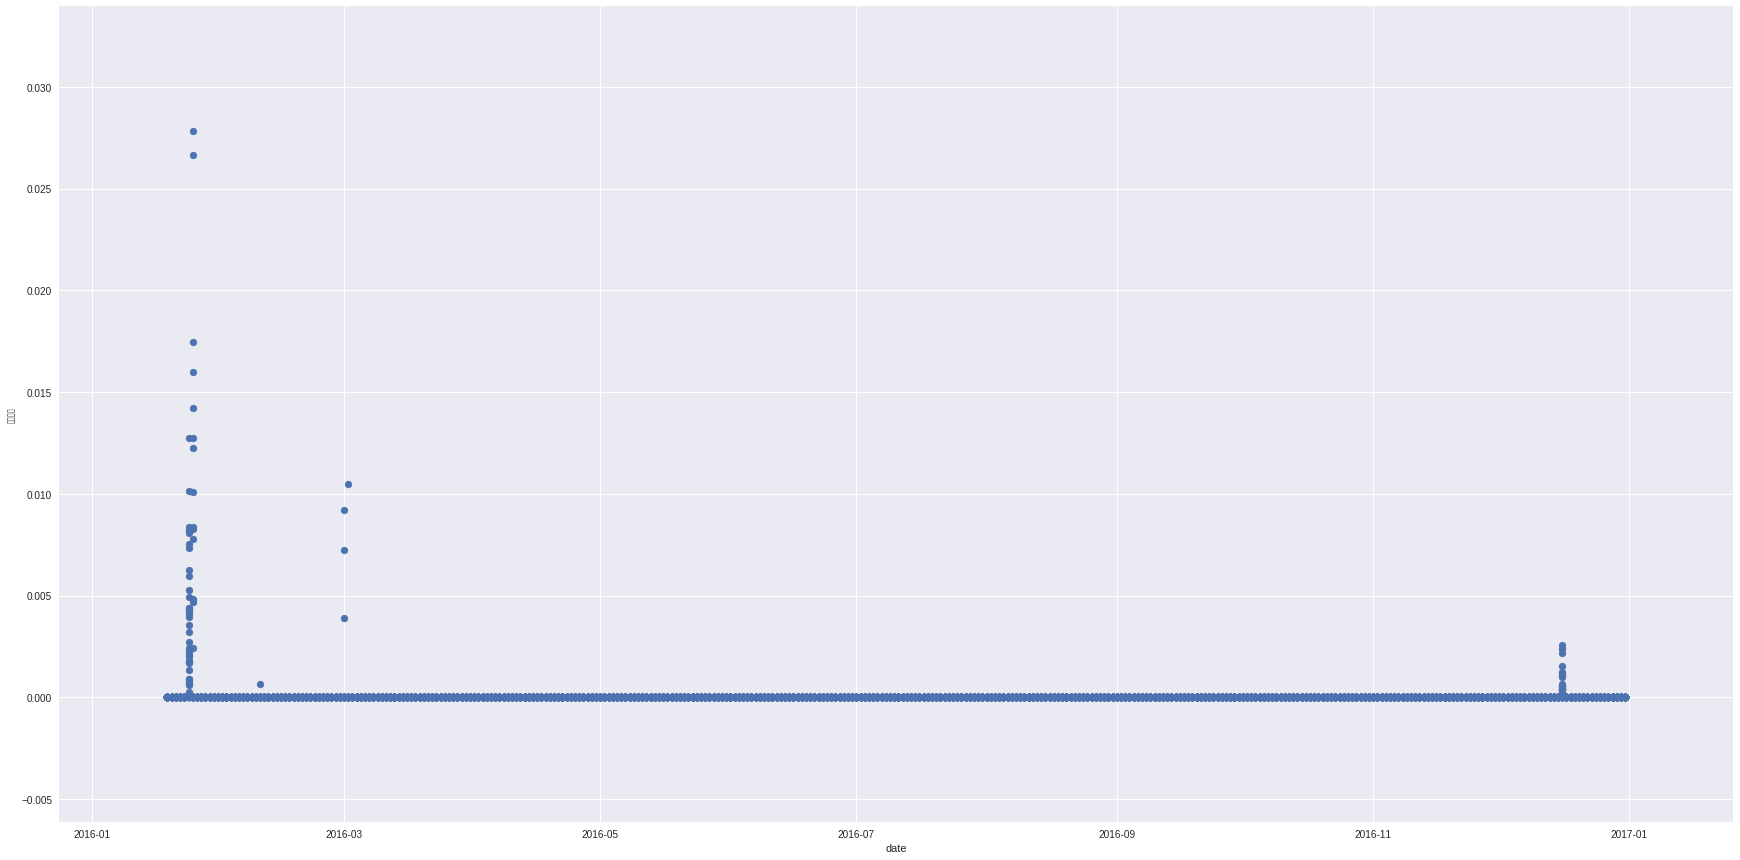

In [45]:
#https://qiita.com/ColdFreak/items/1028927c81fdfa5f3ac2

plt.figure(figsize=(30,15))
df = train.set_index("date")
plt.scatter(df.index,train["台車部分"])
plt.xlabel("date")
plt.ylabel("台車部分")
plt.show()

天候ごとに色をかえてプロットしたくなる